**This notebook accompanies the merge step of the pipeline.**

In the merge step, unlike steps previous to it, are difficult to analyze in it's separate components. Therefore, we view the final merged data only.

In [2]:
import ops
from ops.imports_ipython import *
import glob

### Visualize merge output from collated information across all wells, and clean up dataframe

In [2]:
# read in data
df_merged = pd.read_hdf('merge.hdf')

#### add distance to FOV center for each cell

In [3]:
def fov_distance(df,i='i',j='j',dimensions=(2960,2960),suffix=''):
    # define a lambda function to calculate the distance of each point from the center of the field of view
    distance  = lambda x: np.sqrt((x[i]-(dimensions[0]/2))**2+(x[j]-(dimensions[1]/2))**2)
    df['fov_distance'+suffix]=df.apply(distance,axis=1)
    return df

In [4]:
# add distance to FOV to merged data
df_merged.pipe(fov_distance,i='i_0',j='j_0',suffix='_0');
df_merged.pipe(fov_distance,i='i_1',j='j_1',dimensions=(1480,1480),suffix='_1');
df_merged.sort_values(['fov_distance_1']).head(10)

well  tile  cell_0          i_0          j_0  site  cell_1         i_1  \
541   A2   401     580  1460.656728  1462.039484   103    2024  739.677778   
455   B1   726     531  1460.657128  1458.038502   185    1690  740.335821   
484   B2  1204     547  1464.825231  1455.671296   309    1871  740.140449   
503   B1   259     569  1456.069353  1455.382431    64    1948  739.587156   
427   B1   481     476  1456.923957  1458.395083   126    1775  739.992188   
889   B3   702    1005  1468.280478  1461.160956   197    3901  740.616438   
461   B1   879     533  1462.474792  1457.004895   229    1882  740.750000   
477   B1   330     532  1456.841689  1451.775286    88    1772  740.234568   
467   B2   877     526  1466.029169  1456.380651   230    1752  740.916084   
443   A2   632     485  1467.139889  1469.548476   162    1814  740.445860   

            j_1  distance  fov_distance_0  fov_distance_1  
541  740.011111  0.120711       26.395876        0.322414  
455  740.373134  0.235584       29.265237        0.502001  
484  739.494382  0.284825       28.673323        0.524762  
503  739.669725  0.304466       34.332209        0.528698  
427  740.656250  0.037046       31.611331        0.656297  
889  739.712329  0.036558       22.186860        0.680258  
461  739.723684  0.105763       28.912070        0.799281  
477  739.222222  0.107222       36.509476        0.812379  
467  739.832168  0.162736       27.441898        0.931331  
443  740.840764  0.293243       16.571566        0.951670

#### add mapping info

In [5]:
# read in data
df_cells = pd.read_hdf('../sbs_1/cells.hdf')

In [6]:
# add a boolean mapped single gene column if gene_symbol_1 = gene_symbol_2, or there is only one of them on df_cells
df_cells['mapped_single_gene'] = (df_cells.apply(lambda x: True 
                    if (pd.notnull(x.gene_symbol_0)&pd.isnull(x.gene_symbol_1))|(x.gene_symbol_0==x.gene_symbol_1) 
                    else False,axis=1))
df_cells.head(10)

cell  tile well       Q_0       Q_1       Q_2       Q_3       Q_4  \
0    22   297   B2  0.993796  0.014968  0.653542  0.192267  0.239157   
1    29   297   B2  1.000000  1.000000  1.000000  1.000000  1.000000   
2    30   297   B2  0.715966  0.610488  1.000000  0.500457  0.948254   
3    32   297   B2  0.475672  1.000000  1.000000  0.386020  0.659191   
4    34   297   B2  0.778610  1.000000  1.000000  0.363921  0.454565   
5    37   297   B2  0.235224  1.000000  0.575858  0.849554  1.000000   
6    38   297   B2  1.000000  0.946176  0.505459  0.254596  0.646828   
7    40   297   B2  1.000000  1.000000  1.000000  0.592947  1.000000   
8    41   297   B2  0.355748  0.234789  0.464564  0.076855  0.493429   
9    42   297   B2  0.922356  0.739895  1.000000  0.440950  0.940950   

        Q_5       Q_6  ...  cell_barcode_1  cell_barcode_count_1  \
0  0.489709  0.587318  ...       TAAGCGGTA                   1.0   
1  0.900257  0.793945  ...       AAGCACGTC                   1.0   
2  1.000000  0.908842  ...       TGAGCTAGA                   1.0   
3  0.568247  0.417673  ...       TGAGCTAGA                   1.0   
4  1.000000  1.000000  ...             NaN                   0.0   
5  1.000000  0.484022  ...             NaN                   0.0   
6  1.000000  0.121473  ...             NaN                   0.0   
7  0.603938  1.000000  ...             NaN                   0.0   
8  0.210607  1.000000  ...             NaN                   0.0   
9  0.926350  0.480358  ...             NaN                   0.0   

   barcode_count               sgRNA_0 gene_symbol_0  gene_id_0  \
0              2                   NaN           NaN        NaN   
1              3  ACCCAGGAGGACCTGACCCA        CCDC96     CCDC96   
2              3  AACTTGGCTATGAATGAAGG          ASPM       ASPM   
3              7  ACATCTTGCTGGGGAGGCAG       C8orf33    C8orf33   
4              3  AACTTGGCTATGAATGAAGG          ASPM       ASPM   
5              1  GATCAATTTCTGAATCCCCA          CDK1       CDK1   
6              3                   NaN           NaN        NaN   
7              2  CCAGGGGCTCACCTTGCCCA        CORO1A     CORO1A   
8              2  CAGTCTGTTCTGATAACCTG         CDC20      CDC20   
9              2  GGCTGGTTCTGTTGACACGG      KIAA1211   KIAA1211   

                sgRNA_1  gene_symbol_1  gene_id_1 mapped_single_gene  
0                   NaN            NaN        NaN              False  
1                   NaN            NaN        NaN               True  
2  TGAGCTAGACTACGATGAGG         ZC3H18     ZC3H18              False  
3  TGAGCTAGACTACGATGAGG         ZC3H18     ZC3H18              False  
4                   NaN            NaN        NaN               True  
5                   NaN            NaN        NaN               True  
6                   NaN            NaN        NaN              False  
7                   NaN            NaN        NaN               True  
8                   NaN            NaN        NaN               True  
9                   NaN            NaN        NaN               True  

[10 rows x 26 columns]

In [7]:
# show counts of cells with a single mapped gene
df_cells.mapped_single_gene.value_counts()

mapped_single_gene
True     3638724
False    3582338
Name: count, dtype: int64

In [8]:
# show proprtion of cells with a single mapped gene
df_cells.mapped_single_gene.value_counts(normalize=True)

mapped_single_gene
True     0.503904
False    0.496096
Name: proportion, dtype: float64

In [9]:
# join df_merged with important columns from df_cells 
df_merged = df_merged.merge((df_cells[['well','tile','cell','sgRNA_0','gene_symbol_0','mapped_single_gene']]
                             .rename({'tile':'site','cell':'cell_1'},axis=1)),
                            how='left',on=['well','site','cell_1'])
df_merged.head(10).sort_values(['mapped_single_gene','fov_distance_1'],ascending=[False,True])

well  tile  cell_0        i_0          j_0  site  cell_1          i_1  \
4   A2   641      13  53.515425  1136.704289   166    2283  1019.772727   
1   A2   641       6  23.093589  1034.938836   166    2264  1011.989247   
8   A2   641      19  79.525000  1102.379878   166    2294  1025.990991   
3   A2   641      11  41.383252   950.473638   166    2273  1016.655405   
6   A2   641      16  62.977768   777.325923   166    2286  1022.350993   
5   A2   641      15  60.552431  1605.008932   166    2284  1021.142132   
0   A2   641       8  21.630839  1843.945845   166    2259  1010.355330   
2   A2   641       9  30.351051  1975.385249   166    2269  1013.514793   
9   A2   641      21  88.186082   998.234021   166    2296  1028.304000   
7   A2   641      17  64.766761  2429.649197   166    2289  1022.731343   

          j_1  distance  fov_distance_0  fov_distance_1               sgRNA_0  \
4  657.738636  1.275918     1467.211705      291.615690  GACAGCAACAGAATCACTGA   
1  632.473118  1.394163     1523.369860      292.472530  ATAGGTCATCCACTGGGCGG   
8  649.486486  1.376605     1450.492048      299.972571  GACAGCAACAGAATCACTGA   
3  611.317568  1.475630     1532.976293      305.118636  GCGAGAGAGTCAGCTGCAAC   
6  568.251656  1.963440     1581.677231      330.483853  GCGAGAGAGTCAGCTGCAAC   
5  774.436548  0.354140     1424.941624      283.243313  AAATTGCCTAAATCACGAGG   
0  833.791878  1.019245     1503.095868      286.162403  AAAGTGTCTCAGCCCATTGA   
2  866.946746  0.134017     1531.955816      301.539082  GTCATCATCCTCCGAGGGGT   
9  623.296000  1.400715     1472.835510      311.028970  ATAGGTCATCCACTGGGCGG   
7  979.701493  0.988528     1704.323537      370.666721  AATATGCATTGAGTGGTCAC   

  gene_symbol_0 mapped_single_gene  
4          ANLN               True  
1      sg_nt336               True  
8          ANLN               True  
3      RABGAP1L               True  
6      RABGAP1L               True  
5         CENPJ              False  
0          CLTC              False  
2          CBX1              False  
9      sg_nt336              False  
7      PAFAH1B1              False

In [10]:
del df_cells

#### add phenotype min info

In [11]:
# read in data
df_phenotype = pd.read_hdf('../ph_2/min_cp_phenotype.hdf')

In [12]:
min_cols = [col for col in df_phenotype.columns if '_min' in col]
info_cols = [col for col in df_phenotype.columns if col not in min_cols]
# calculate the minimum value for each row in min_cols and assign it to 'channels_min' column in df_phenotype
df_phenotype['channels_min'] = df_phenotype[min_cols].apply(lambda x: x.min(axis=0),axis=1)

In [13]:
# join df_merged with channels_min column from df_phenotype 
df_merged = df_merged.merge((df_phenotype[['well','tile','label','channels_min']]
                             .rename(columns={'label':'cell_0'})),
                            how='left',on=['well','tile','cell_0'])

In [14]:
del df_phenotype

#### remove cells by intensity and bad matching

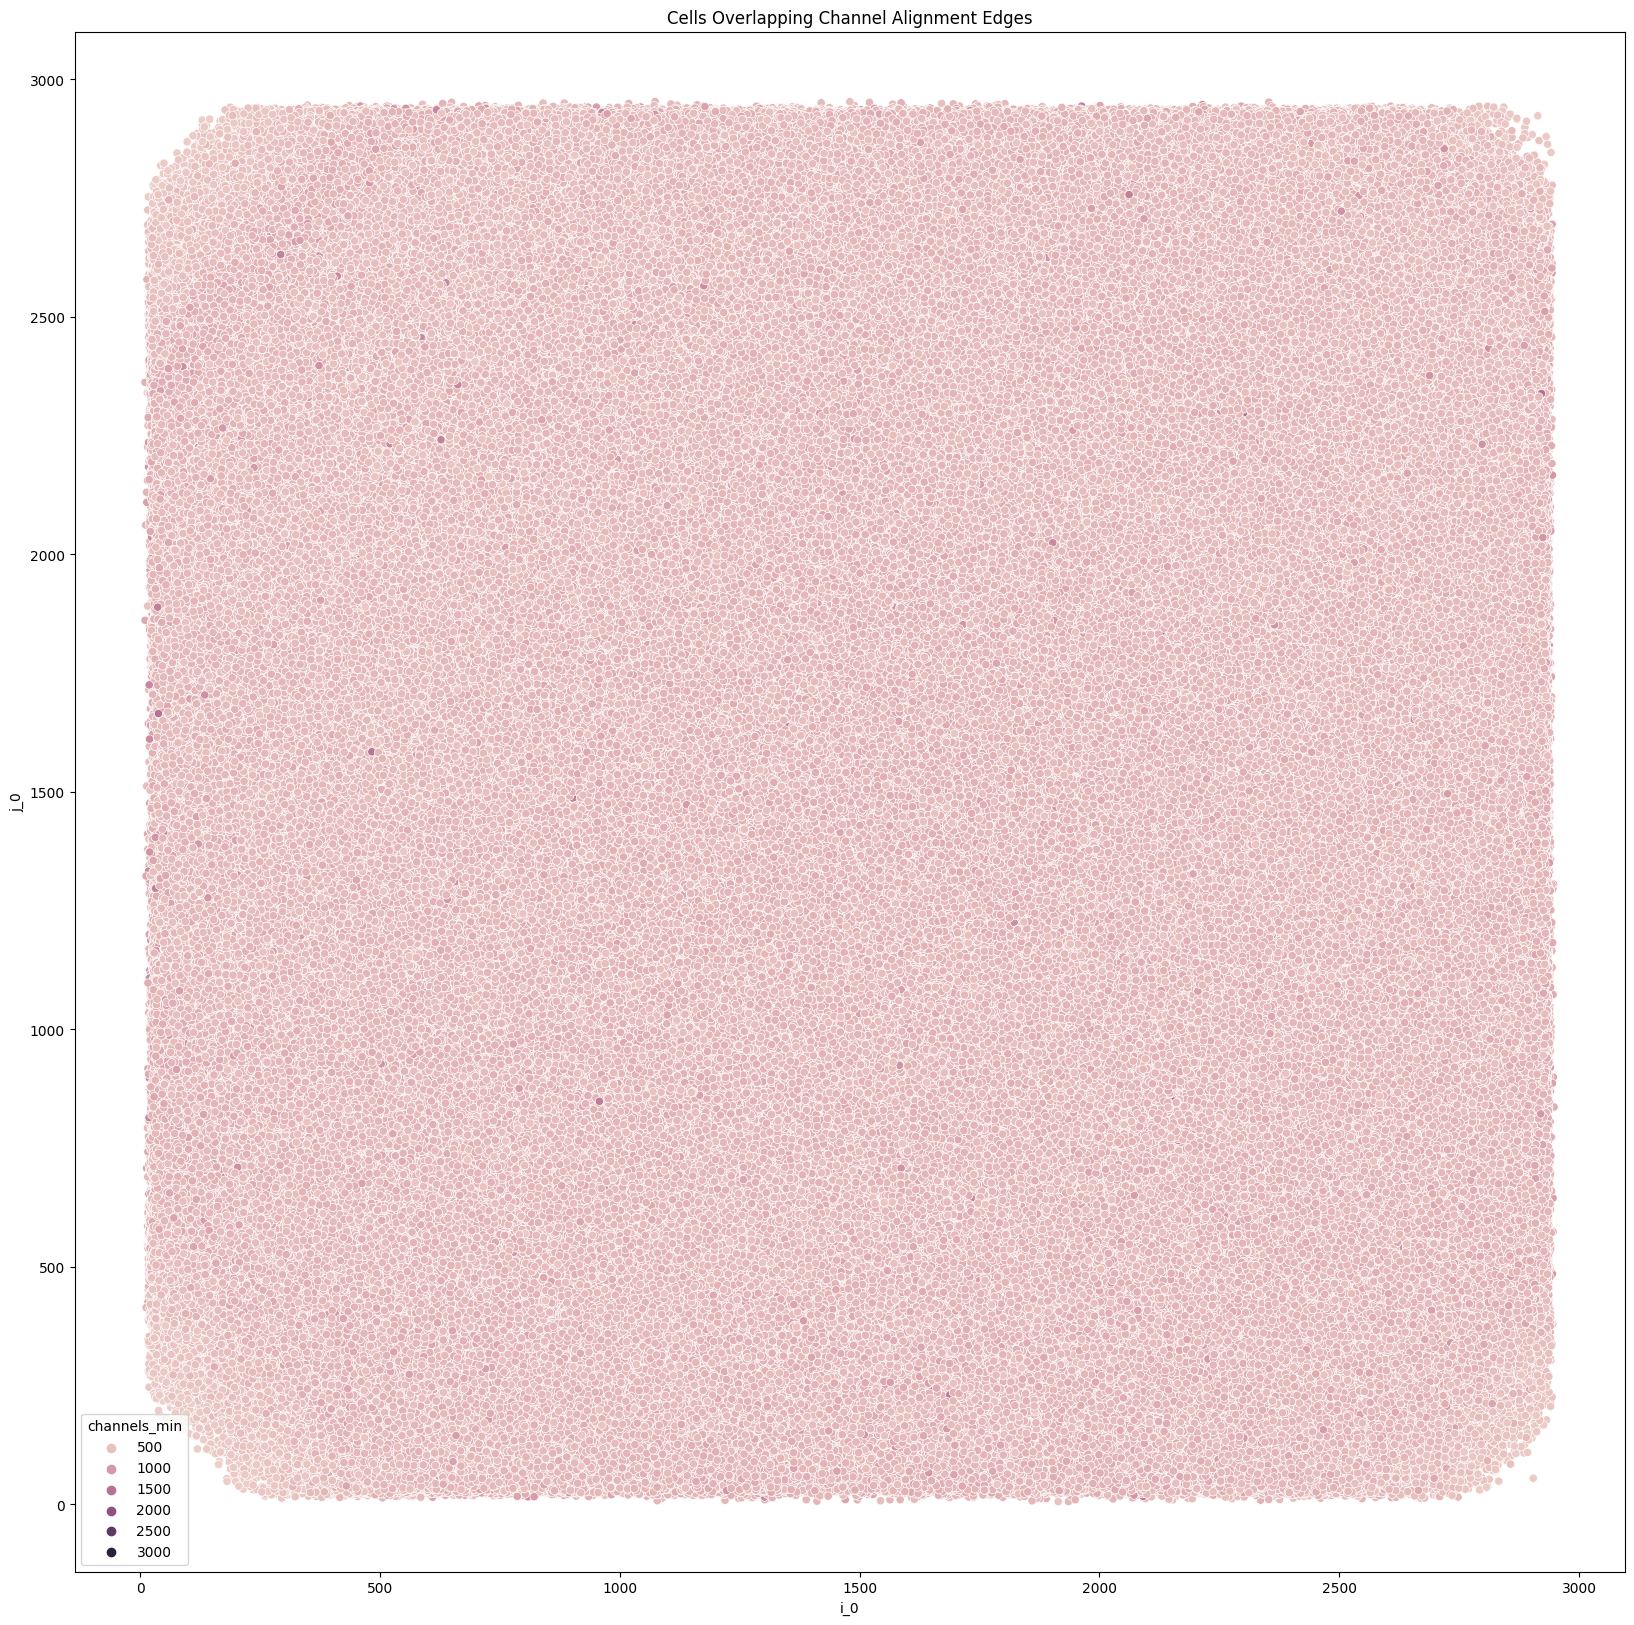

In [15]:
# plot cells according to location
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df_merged, x='i_0', y='j_0', hue='channels_min')
plt.title('Cells Overlapping Channel Alignment Edges')
plt.xlabel('i_0')
plt.ylabel('j_0')
plt.show()

In [16]:
# remove bad tiles (optional) and cells with phenotype channel min ==0
df_merged_clean = (df_merged
                   # .query('well != @misaligned_wells & tile != @misaligned_tiles')
                   .query('channels_min>0'))

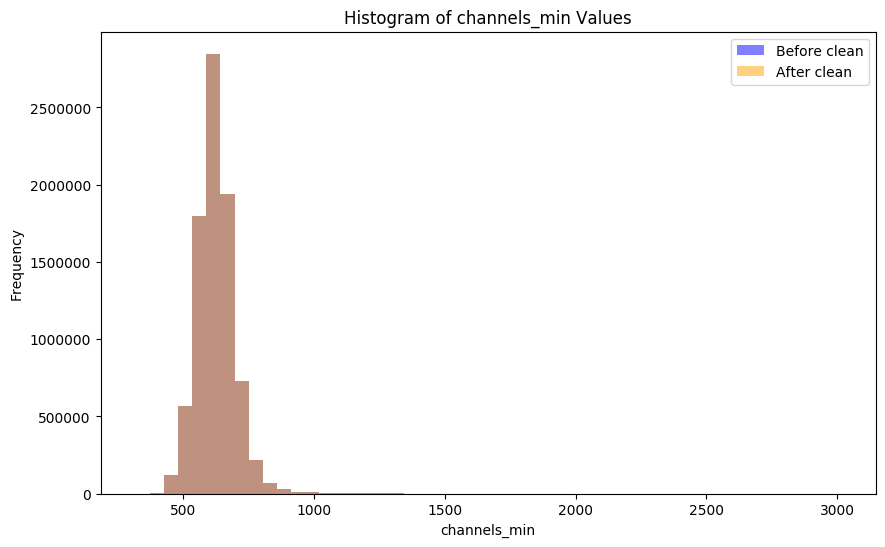

In [17]:
# plot channel min values in a histogram
plt.figure(figsize=(10, 6))
plt.hist(df_merged['channels_min'].dropna(), bins=50, color='blue', alpha=0.5, label='Before clean')
plt.hist(df_merged_clean['channels_min'].dropna(), bins=50, color='orange', alpha=0.5, label='After clean')
plt.title('Histogram of channels_min Values')
plt.xlabel('channels_min')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [18]:
# save to hdf
df_merged_clean.to_hdf('merged_clean.hdf', 'x', mode='w')
df_merged_clean.head(10)

<ipython-input-18-d118ad3fe49c>:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['well', 'sgRNA_0', 'gene_symbol_0', 'mapped_single_gene'], dtype='object')]

  df_merged_clean.to_hdf('merged_clean.hdf', 'x', mode='w')


well  tile  cell_0         i_0          j_0  site  cell_1          i_1  \
3    A2   641      11   41.383252   950.473638   166    2273  1016.655405   
4    A2   641      13   53.515425  1136.704289   166    2283  1019.772727   
5    A2   641      15   60.552431  1605.008932   166    2284  1021.142132   
6    A2   641      16   62.977768   777.325923   166    2286  1022.350993   
7    A2   641      17   64.766761  2429.649197   166    2289  1022.731343   
8    A2   641      19   79.525000  1102.379878   166    2294  1025.990991   
9    A2   641      21   88.186082   998.234021   166    2296  1028.304000   
10   A2   641      22   92.581921  1169.016949   166    2297  1029.019608   
11   A2   641      20   87.525584  2177.493882   166    2298  1028.514706   
12   A2   641      23  105.879892   853.347927   166    2306  1032.800000   

           j_1  distance  fov_distance_0  fov_distance_1  \
3   611.317568  1.475630     1532.976293      305.118636   
4   657.738636  1.275918     1467.211705      291.615690   
5   774.436548  0.354140     1424.941624      283.243313   
6   568.251656  1.963440     1581.677231      330.483853   
7   979.701493  0.988528     1704.323537      370.666721   
8   649.486486  1.376605     1450.492048      299.972571   
9   623.296000  1.400715     1472.835510      311.028970   
10  665.405229  0.565818     1421.843657      298.490726   
11  917.110294  0.597176     1557.396133      338.539203   
12  587.339394  1.756195     1510.264511      330.207663   

                 sgRNA_0 gene_symbol_0 mapped_single_gene  channels_min  
3   GCGAGAGAGTCAGCTGCAAC      RABGAP1L               True         549.0  
4   GACAGCAACAGAATCACTGA          ANLN               True         611.0  
5   AAATTGCCTAAATCACGAGG         CENPJ              False         506.0  
6   GCGAGAGAGTCAGCTGCAAC      RABGAP1L               True         512.0  
7   AATATGCATTGAGTGGTCAC      PAFAH1B1              False         623.0  
8   GACAGCAACAGAATCACTGA          ANLN               True         560.0  
9   ATAGGTCATCCACTGGGCGG      sg_nt336              False         552.0  
10  AGATGAGTGGACACTCGATG          POLE              False         525.0  
11  GTATGAAAGAAACGAACCGG          DSN1              False         652.0  
12  GCGAGAGAGTCAGCTGCAAC      RABGAP1L               True         484.0

In [19]:
del df_merged

#### filter merged datasets for duplicates

In [20]:
# show number of duplicated cells (sbs data)
df_merged_clean.groupby(['well','tile']).cell_0.value_counts().value_counts()

count
1    5474520
2    1433129
3       4328
4         10
Name: count, dtype: int64

In [21]:
# drop sbs cells mapping to same phenotype cell by priority (mapping, fov_distance)
df_merged_filt_sbs = (df_merged_clean
                      .sort_values(['mapped_single_gene','fov_distance_1'],ascending=[False,True])
                      .drop_duplicates(['well','tile','cell_0'],keep='first'))

In [22]:
# show number of duplicated cells (sbs data)
df_merged_filt_sbs.groupby(['well','site']).cell_1.value_counts().value_counts()

count
1    4622571
2    1125860
3      11613
4        713
5          1
Name: count, dtype: int64

In [23]:
# drop duplicated phenotype cells mapping to same sbs cell by priority (fov_distance)
df_merged_filt_ph = (df_merged_filt_sbs
                     .sort_values(['fov_distance_0'],ascending=True)
                     .drop_duplicates(['well','site','cell_1'],keep='first'))

In [24]:
# print total remaining cells
print("Total remaining cells:", len(df_merged_filt_ph))

Total remaining cells: 5760758


In [25]:
# print total remaining cells with mapped single gene
print("Total remaining cells with mapped single gene:", df_merged_filt_ph[df_merged_filt_ph.mapped_single_gene==True].pipe(len))

Total remaining cells with mapped single gene: 2850669


In [26]:
# save to hdf
df_merged_filt_ph.to_hdf('merged_deduped.hdf', 'x', mode='w')
df_merged_filt_ph.head(10)

<ipython-input-26-b565a5a30c41>:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['well', 'sgRNA_0', 'gene_symbol_0', 'mapped_single_gene'], dtype='object')]

  df_merged_filt_ph.to_hdf('merged_deduped.hdf', 'x', mode='w')


well  tile  cell_0          i_0          j_0  site  cell_1  \
700324    A3  1198     733  1480.399825  1479.292213   306    2763   
8448821   B3   479     526  1480.857403  1479.861044   125    2038   
6814339   B3   491     502  1480.909091  1480.080861   131    1772   
680243    B3   714     567  1479.047794  1479.536239   191    1847   
1719032   B2  1166     518  1479.463671  1478.999044   293    1818   
4935104   B2   179     643  1480.599656  1481.080756    47     294   
2510333   B3   939     768  1480.254642  1478.781830   239     357   
6171911   B3   191     554  1479.325955  1478.712603    53     269   
1525894   A2  1140     632  1478.967213  1478.910291   305    2285   
4316674   B2   306     672  1478.395554  1479.612836    76    2474   

                i_1         j_1  distance  fov_distance_0  fov_distance_1  \
700324   743.206667  744.726667  0.101886        0.812909        5.711750   
8448821  744.936508  746.333333  0.727560        0.868590        8.029958   
6814339  744.262411  748.170213  0.122164        0.912680        9.215233   
680243   743.517544  745.315789  0.191803        1.059136        6.374224   
1719032  744.086331  745.971223  0.687714        1.135589        7.235579   
4935104  112.857143  746.941176  0.300843        1.235970      627.181268   
2510333  110.147059  746.117647  0.746219        1.244500      629.882650   
6171911  111.100000  748.321053  0.239643        1.453179      628.955046   
1525894  741.084507  108.535211  0.064259        1.501371      631.465720   
4316674  746.104938  744.037037  0.348793        1.650498        7.319012   

                      sgRNA_0 gene_symbol_0 mapped_single_gene  channels_min  
700324   GCGTCAGCAAGACCTACACC        CCDC86              False         690.0  
8448821  ACCTACCGAAAACCTGTCCT         LSM11              False         590.0  
6814339  TCCTCATCCAGGATCACGGA       SELENON               True         596.0  
680243   AGGGTATAACTTGAAAGAGG       PPP2R2A              False         659.0  
1719032  GATGTGTACTCGTTCTCTCA          RAI1               True         547.0  
4935104  GGCGGTGAAGGCGGAAGCGT        FAM98C               True         689.0  
2510333  CGTAATTTTGTAATCGCTTC      sg_nt556              False         746.0  
6171911  AGTGGAGTGCTGGTTCCAGG         CTPS1               True         576.0  
1525894  TAGTTGTTCACTGCCTGTGG          SKA3              False         684.0  
4316674  GAGCTCAACAAGCTGCTGGG         H2AFX              False         729.0

In [27]:
del df_merged_filt_sbs
del df_merged_filt_ph

#### check cell matching rate

In [28]:
# read in sbs_info
df_sbs_info = pd.read_hdf('../sbs_1/sbs_info.hdf')
df_sbs_info.head(10)

area         i            j  cell              bounds  tile well
0    61  2.426230   301.311475     1    (0, 296, 7, 308)   243   B1
1    53  1.735849   436.547170     2    (0, 430, 5, 443)   243   B1
2    39  1.256410   535.358974     3    (0, 530, 4, 542)   243   B1
3    38  1.447368   591.789474     4    (0, 586, 5, 597)   243   B1
4   106  3.377358   647.669811     5    (0, 640, 9, 656)   243   B1
5    55  1.981818   680.490909     6    (0, 674, 6, 687)   243   B1
6    48  1.625000   830.708333     7    (0, 825, 5, 838)   243   B1
7    63  2.476190  1086.650794     8  (0, 1082, 7, 1094)   243   B1
8    73  2.767123  1112.479452     9  (0, 1107, 8, 1119)   243   B1
9    84  2.130952  1181.392857    10  (0, 1173, 6, 1190)   243   B1

In [30]:
# merge df_sbs_info to df_merged
df_sbs_matching = (df_sbs_info
                   .rename(columns={'cell':'cell_1','tile':'site'})
                   .drop(columns=['i','j'])
                   .merge(df_merged_clean, how='left',on=['well','site','cell_1']))
df_sbs_matching.head(10)

area  cell_1              bounds  site well   tile  cell_0          i_0  \
0    61       1    (0, 296, 7, 308)   243   B1  928.0   387.0  1054.636117   
1    53       2    (0, 430, 5, 443)   243   B1  947.0   326.0  1038.387258   
2    39       3    (0, 530, 4, 542)   243   B1    NaN     NaN          NaN   
3    38       4    (0, 586, 5, 597)   243   B1    NaN     NaN          NaN   
4   106       5    (0, 640, 9, 656)   243   B1  947.0   330.0  1048.423820   
5    55       6    (0, 674, 6, 687)   243   B1  947.0   327.0  1038.640971   
6    48       7    (0, 825, 5, 838)   243   B1    NaN     NaN          NaN   
7    63       8  (0, 1082, 7, 1094)   243   B1  947.0   328.0  1040.010427   
8    73       9  (0, 1107, 8, 1119)   243   B1    NaN     NaN          NaN   
9    84      10  (0, 1173, 6, 1190)   243   B1    NaN     NaN          NaN   

           j_0       i_1          j_1  distance  fov_distance_0  \
0  2239.995927  2.426230   301.311475  0.818057      870.935268   
1   246.421611  1.735849   436.547170  1.901640     1310.243281   
2          NaN       NaN          NaN       NaN             NaN   
3          NaN       NaN          NaN       NaN             NaN   
4  1087.609438  3.377358   647.669811  0.895068      583.290967   
5  1219.757316  1.981818   680.490909  1.950427      512.371005   
6          NaN       NaN          NaN       NaN             NaN   
7  2841.960278  2.476190  1086.650794  1.938662     1431.267488   
8          NaN       NaN          NaN       NaN             NaN   
9          NaN       NaN          NaN       NaN             NaN   

   fov_distance_1 sgRNA_0 gene_symbol_0 mapped_single_gene  channels_min  
0      858.174043     NaN           NaN                NaN         580.0  
1      798.196452     NaN           NaN                NaN         610.0  
2             NaN     NaN           NaN                NaN           NaN  
3             NaN     NaN           NaN                NaN           NaN  
4      742.386543     NaN           NaN                NaN         667.0  
5      740.413512     NaN           NaN                NaN         594.0  
6             NaN     NaN           NaN                NaN           NaN  
7      814.928305     NaN           NaN                NaN         542.0  
8             NaN     NaN           NaN                NaN           NaN  
9             NaN     NaN           NaN                NaN           NaN

In [31]:
# before deduping, how many cells in df_sbs_info match to a cell in df_merged
for well,df in df_sbs_matching.groupby('well'):
    all_cells = df.pipe(len)
    lonely_cells = df.distance.isnull().sum() # missing in df_sbs_info
    mapping = (all_cells-lonely_cells)/all_cells
    print('For well '+well+', cell matching rate is '+str(mapping*100)+'%')

For well A1, cell matching rate is 90.08792638596397%
For well A2, cell matching rate is 89.60508394680033%
For well A3, cell matching rate is 89.6566544339783%
For well B1, cell matching rate is 89.50108024588135%
For well B2, cell matching rate is 89.39651222852125%
For well B3, cell matching rate is 89.46047517389454%


In [32]:
del df_sbs_info
del df_sbs_matching

In [33]:
# read in phenotype_info
df_phenotype_info = pd.read_hdf('../ph_2/phenotype_info.hdf')
df_phenotype_info.head(5)

area          i            j  cell               bounds  tile well
0   514   6.441634   723.741245     1    (0, 705, 17, 746)   128   B1
1   974   7.679671   844.543121     2    (0, 814, 22, 882)   128   B1
2  1545  15.407120  1074.530744     3  (0, 1050, 38, 1102)   128   B1
3   806   8.954094  1427.527295     4  (0, 1404, 23, 1451)   128   B1
4   715   6.689510  1811.727273     5  (0, 1784, 18, 1840)   128   B1
5   641  10.702028  2224.620905     6  (0, 2207, 27, 2241)   128   B1
6   808  10.573020  1369.116337     7  (0, 1348, 23, 1391)   128   B1
7  1271  15.041699  2074.933124     8  (0, 2051, 36, 2097)   128   B1
8  1216  15.247533  2257.263980     9  (0, 2238, 36, 2280)   128   B1
9  1849  20.908599   675.268794    10    (0, 652, 48, 705)   128   B1

In [34]:
#before deduping, how many sbs cells map to a phenotype cell
df_phenotype_matching = (df_phenotype_info
                         .rename(columns={'cell':'cell_0'})
                         .drop(columns=['i','j'])
                         .merge(df_merged_clean, how='left',on=['well','tile','cell_0']))
df_phenotype_matching.head(5)

area  cell_0               bounds  tile well  i_0  j_0  site  cell_1  i_1  \
0   514       1    (0, 705, 17, 746)   128   B1  NaN  NaN   NaN     NaN  NaN   
1   974       2    (0, 814, 22, 882)   128   B1  NaN  NaN   NaN     NaN  NaN   
2  1545       3  (0, 1050, 38, 1102)   128   B1  NaN  NaN   NaN     NaN  NaN   
3   806       4  (0, 1404, 23, 1451)   128   B1  NaN  NaN   NaN     NaN  NaN   
4   715       5  (0, 1784, 18, 1840)   128   B1  NaN  NaN   NaN     NaN  NaN   
5   641       6  (0, 2207, 27, 2241)   128   B1  NaN  NaN   NaN     NaN  NaN   
6   808       7  (0, 1348, 23, 1391)   128   B1  NaN  NaN   NaN     NaN  NaN   
7  1271       8  (0, 2051, 36, 2097)   128   B1  NaN  NaN   NaN     NaN  NaN   
8  1216       9  (0, 2238, 36, 2280)   128   B1  NaN  NaN   NaN     NaN  NaN   
9  1849      10    (0, 652, 48, 705)   128   B1  NaN  NaN   NaN     NaN  NaN   

   j_1  distance  fov_distance_0  fov_distance_1 sgRNA_0 gene_symbol_0  \
0  NaN       NaN             NaN             NaN     NaN           NaN   
1  NaN       NaN             NaN             NaN     NaN           NaN   
2  NaN       NaN             NaN             NaN     NaN           NaN   
3  NaN       NaN             NaN             NaN     NaN           NaN   
4  NaN       NaN             NaN             NaN     NaN           NaN   
5  NaN       NaN             NaN             NaN     NaN           NaN   
6  NaN       NaN             NaN             NaN     NaN           NaN   
7  NaN       NaN             NaN             NaN     NaN           NaN   
8  NaN       NaN             NaN             NaN     NaN           NaN   
9  NaN       NaN             NaN             NaN     NaN           NaN   

  mapped_single_gene  channels_min  
0                NaN           NaN  
1                NaN           NaN  
2                NaN           NaN  
3                NaN           NaN  
4                NaN           NaN  
5                NaN           NaN  
6                NaN           NaN  
7                NaN           NaN  
8                NaN           NaN  
9                NaN           NaN

In [35]:
for well,df in df_phenotype_matching.groupby('well'):
    all_cells = df.pipe(len)
    lonely_cells = df.distance.isnull().sum() # missing in df_phenotype_info
    mapping = (all_cells-lonely_cells)/all_cells
    print('For well '+well+', cell matching rate is '+str(mapping*100)+'%')

For well A1, cell matching rate is 85.12785380025046%
For well A2, cell matching rate is 85.0854981303088%
For well A3, cell matching rate is 85.3737633478375%
For well B1, cell matching rate is 84.75049910313447%
For well B2, cell matching rate is 84.75901403620657%
For well B3, cell matching rate is 84.73747028477298%


In [36]:
del df_phenotype_info
del df_phenotype_matching

In [37]:
del df_merged_clean

#### final merge with full phenotype data

In [ ]:
# read in data
df_merged_deduped = pd.read_hdf('merged_deduped.hdf')
df_cp_phenotype = pd.read_hdf('../ph_2/cp_phenotype.hdf')

In [ ]:
df_merged_deduped.head(10)

In [ ]:
df_cp_phenotype.head(10)